In [1]:
import cv2
import mediapipe
import numpy as np
import pandas as pd
import glob
import os
import tqdm
import matplotlib.pyplot as plt
from deepface import DeepFace
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import fclusterdata

In [2]:
models = [
  "VGG-Face", 
  "Facenet", 
  "Facenet512", 
  "OpenFace", 
  "DeepFace", 
  "DeepID", 
  "ArcFace", 
  "Dlib", 
  "SFace",
]

In [3]:
embedding_objs = DeepFace.represent(img_path = "norm_cut_faces/1828_1942-10-11_2013.jpg", enforce_detection=False, model_name=models[0])

print(embedding_objs)
embedding = embedding_objs[0]["embedding"]
print(len(embedding))
print(np.sum(np.array(embedding) != 0))

[{'embedding': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.037111983553622774, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.012164403296311497, 0.0, 0.040779625047602394, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.004680883651075422, 0.05639404523482326, 0.0, 0.0, 0.03404970510021254, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.016361817302710854, 0.0, 0.06204819109782684, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.07650039018520723, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.021688301490087145, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006103741422822421, 0.0, 0.0, 0.0, 0.0, 0.05116715888710636, 0.03900020032930558, 0.0, 0.0, 0.0, 0.0, 0.019830777093824425, 0.0, 0.0, 0.0, 0.0, 0.0, 0.013501552964047262, 0.0, 0.0, 0.0, 0.0, 0.051621842476404736, 0.0, 0.0, 0.04034976528382839, 0.0, 0.0, 0.04796870029189686, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0836025055622697, 0.020590967386885074, 0.0, 0.0, 0.0, 0.0, 0.0256473

In [23]:
embedding_objs = DeepFace.represent(img_path = "norm_cut_faces/1828_1942-10-11_2013.jpg", enforce_detection=False, model_name=models[1])

print(embedding_objs)
embedding = embedding_objs[0]["embedding"]
print(len(embedding))
print(np.sum(np.array(embedding) != 0))

[{'embedding': [-1.1797502040863037, -1.9046118259429932, 0.7970114350318909, -0.315214604139328, -0.4674505889415741, -0.4010671377182007, -1.7169036865234375, 2.1182618141174316, 0.5504274964332581, -0.04580169543623924, -0.6671733856201172, 0.8394894003868103, -1.0726367235183716, 1.5748999118804932, 0.11180472373962402, -1.0616741180419922, 1.0271412134170532, 0.9040646553039551, 0.6578649282455444, -2.0741524696350098, -0.14316409826278687, -2.0505175590515137, -0.5454550385475159, 0.12684474885463715, 1.8883475065231323, -1.9259214401245117, 0.25123417377471924, 1.406100869178772, 0.5956366062164307, -0.3674449920654297, -1.5020897388458252, 1.9215755462646484, -1.2255032062530518, -0.2394031584262848, 0.5827651023864746, -0.09878455102443695, -0.6883280277252197, -0.26005247235298157, -1.2090439796447754, 0.6704119443893433, 0.7008634209632874, 0.3129158318042755, 0.23891432583332062, 1.7773292064666748, -0.5073162913322449, -0.32976576685905457, 0.2989668846130371, -0.977954506

In [24]:
embedding_objs = DeepFace.represent(img_path = "norm_cut_faces/1828_1942-10-11_2013.jpg", enforce_detection=False, model_name=models[2])

print(embedding_objs)
embedding = embedding_objs[0]["embedding"]
print(len(embedding))
print(np.sum(np.array(embedding) != 0))

24-03-03 01:03:45 - facenet512_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facenet512_weights.h5
To: C:\Users\vladi\.deepface\weights\facenet512_weights.h5
100%|██████████| 95.0M/95.0M [00:09<00:00, 10.4MB/s]


[{'embedding': [1.3438459634780884, -1.1507738828659058, -1.8340946435928345, 1.4518746137619019, -0.12394021451473236, -0.27443191409111023, -1.5455472469329834, 1.9448583126068115, 0.3120422065258026, -1.2273402214050293, 0.17915228009223938, 1.3560640811920166, 0.11630721390247345, -0.8151580691337585, -0.7202829718589783, 0.23191894590854645, 1.071034550666809, 0.6896274089813232, 0.22970059514045715, -0.30237501859664917, -0.3026683032512665, -0.26456138491630554, -0.8225367665290833, -0.5036156177520752, -0.535046398639679, -0.8539259433746338, 0.03344567120075226, 0.7023718357086182, 1.3524823188781738, 1.4825869798660278, -1.4305728673934937, -1.1435601711273193, -0.03941725194454193, 0.3641735315322876, -0.6290649175643921, 0.38489967584609985, -1.334971308708191, 0.09796448051929474, -0.7035854458808899, 2.148878812789917, -1.1494253873825073, 1.1608988046646118, -0.8518791198730469, -1.9848672151565552, -0.1292582005262375, 1.1702404022216797, 0.6762530207633972, 0.905607819

In [25]:
embedding_objs = DeepFace.represent(img_path = "norm_cut_faces/1828_1942-10-11_2013.jpg", enforce_detection=False, model_name=models[3])

print(embedding_objs)
embedding = embedding_objs[0]["embedding"]
print(len(embedding))
print(np.sum(np.array(embedding) != 0))

24-03-03 01:03:56 - openface_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/openface_weights.h5
To: C:\Users\vladi\.deepface\weights\openface_weights.h5
100%|██████████| 15.3M/15.3M [00:01<00:00, 7.94MB/s]


[{'embedding': [0.029559018090367317, 0.19345292448997498, 0.01945934072136879, -0.06666924804449081, 0.00467348750680685, 0.12062622606754303, 0.02983035519719124, 0.042754508554935455, -0.2193250060081482, 0.10644272714853287, 0.03248977288603783, 0.0019766015466302633, 0.08595497906208038, -0.02240614779293537, 0.034187234938144684, -0.04804135859012604, 0.07005410641431808, 0.0070800576359033585, -0.02093447558581829, 0.0697120800614357, -0.02992679923772812, 0.05047771334648132, 0.013000438921153545, 0.024542881175875664, -0.08169209957122803, 0.07278849929571152, -0.007681493181735277, -0.050349004566669464, 0.13592775166034698, -0.026676278561353683, -0.07599958032369614, 0.052711647003889084, -0.08984411507844925, 0.05594908073544502, -0.04723982885479927, -0.013110759668052197, 0.05011630803346634, 0.19951342046260834, -0.018229197710752487, 0.10623674094676971, 0.012390370480716228, -0.03723880648612976, -0.0831565260887146, 0.027264824137091637, -0.1592981517314911, 0.123589

In [26]:
embedding_objs = DeepFace.represent(img_path = "norm_cut_faces/1828_1942-10-11_2013.jpg", enforce_detection=False, model_name=models[4])

print(embedding_objs)
embedding = embedding_objs[0]["embedding"]
print(len(embedding))
print(np.sum(np.array(embedding) != 0))

24-03-03 01:04:19 - VGGFace2_DeepFace_weights_val-0.9034.h5 will be downloaded...


Downloading...
From: https://github.com/swghosh/DeepFace/releases/download/weights-vggface2-2d-aligned/VGGFace2_DeepFace_weights_val-0.9034.h5.zip
To: C:\Users\vladi\.deepface\weights\VGGFace2_DeepFace_weights_val-0.9034.h5.zip
100%|██████████| 511M/511M [00:50<00:00, 10.1MB/s] 


[{'embedding': [0.0, 0.0, 0.0, 0.0, 0.0, 10.72285270690918, 1.372115135192871, 0.0, 0.0, 0.0, 2.2994441986083984, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.2654485702514648, 0.0, 0.0, 0.0, 0.2636057138442993, 0.01972445845603943, 0.0, 1.0334722995758057, 0.0, 1.8457882404327393, 0.0, 0.0, 2.679687261581421, 0.0, 0.0, 0.0, 0.6217836141586304, 8.655826568603516, 0.0, 0.0, 0.0, 0.0, 0.07488209009170532, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.407652854919434, 0.0, 0.0, 6.9639129638671875, 0.0, 0.0, 0.0, 0.0, 5.788637638092041, 0.0, 4.766958713531494, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.6150425672531128, 0.0, 0.15197530388832092, 2.139681339263916, 1.8719422817230225, 0.0, 0.0, 0.0, 0.0, 2.4973247051239014, 0.5247311592102051, 0.0, 0.0, 0.0, 3.2136778831481934, 0.6052488088607788, 0.0, 0.0, 0.0, 0.8890631198883057, 0.0, 0.0, 3.826514482498169, 0.0, 1.1687610149383545, 0.0, 0.0, 0.9154194593429565, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

In [27]:
embedding_objs = DeepFace.represent(img_path = "norm_cut_faces/1828_1942-10-11_2013.jpg", enforce_detection=False, model_name=models[5])

print(embedding_objs)
embedding = embedding_objs[0]["embedding"]
print(len(embedding))
print(np.sum(np.array(embedding) != 0))

24-03-03 01:05:56 - deepid_keras_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/deepid_keras_weights.h5
To: C:\Users\vladi\.deepface\weights\deepid_keras_weights.h5
100%|██████████| 1.61M/1.61M [00:00<00:00, 6.67MB/s]


[{'embedding': [0.0, 0.0, 30.42524528503418, 6.022695541381836, 0.0, 0.0, 42.8211555480957, 0.0, 0.0, 0.0, 9.450211524963379, 3.504167079925537, 37.1003303527832, 0.0, 7.365608215332031, 0.0, 0.0, 0.0, 27.196521759033203, 0.0, 0.0, 0.0, 0.0, 24.15829849243164, 0.0, 29.02959632873535, 0.0, 0.0, 0.0, 0.0, 11.870957374572754, 16.646474838256836, 20.621469497680664, 4.194748878479004, 12.066818237304688, 0.0, 0.0, 9.349699974060059, 24.094295501708984, 62.229103088378906, 0.0, 28.657922744750977, 34.837181091308594, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 35.12035369873047, 36.26899719238281, 0.0, 11.865171432495117, 10.649139404296875, 0.0, 0.0, 10.741475105285645, 26.074825286865234, 1.0835280418395996, 0.0, 13.331197738647461, 0.0, 0.0, 1.6620159149169922, 1.9115650653839111, 5.923703193664551, 0.0, 0.0, 0.0, 46.73054504394531, 0.0, 11.030856132507324, 46.081600189208984, 8.750530242919922, 0.0, 27.62908935546875, 10.793416023254395, 9.512089729309082, 10.995949745178223, 54.740684

In [4]:
embedding_objs = DeepFace.represent(img_path = "norm_cut_faces/1828_1942-10-11_2013.jpg", enforce_detection=False, model_name=models[0])

print(embedding_objs)
embedding = embedding_objs[0]["embedding"]
print(len(embedding))
print(np.sum(np.array(embedding) != 0))

[{'embedding': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.037111983553622774, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.012164403296311497, 0.0, 0.040779625047602394, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.004680883651075422, 0.05639404523482326, 0.0, 0.0, 0.03404970510021254, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.016361817302710854, 0.0, 0.06204819109782684, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.07650039018520723, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.021688301490087145, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006103741422822421, 0.0, 0.0, 0.0, 0.0, 0.05116715888710636, 0.03900020032930558, 0.0, 0.0, 0.0, 0.0, 0.019830777093824425, 0.0, 0.0, 0.0, 0.0, 0.0, 0.013501552964047262, 0.0, 0.0, 0.0, 0.0, 0.051621842476404736, 0.0, 0.0, 0.04034976528382839, 0.0, 0.0, 0.04796870029189686, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0836025055622697, 0.020590967386885074, 0.0, 0.0, 0.0, 0.0, 0.0256473

In [4]:
paths = np.array(glob.glob("norm_cut_faces/*"))[:1000]

In [5]:
embeds = []

for path in tqdm.tqdm(paths):
    embedding_objs = DeepFace.represent(img_path=path, enforce_detection=False, model_name=models[0])
    embedding = embedding_objs[0]["embedding"]
    embeds.append(embedding)

embeds = np.array(embeds)
print(embeds.shape)

100%|██████████| 1000/1000 [06:19<00:00,  2.63it/s]


(1000, 4096)


In [6]:
# Generate synthetic data (replace this with your dataset)
# Example: X = load_your_data() 
X = embeds

# Initialize PCA with the desired number of components
n_components = 50  # You can adjust this value based on your requirements
pca = PCA(n_components=n_components)

# Fit PCA on the data
pca.fit(X)

# Transform the data to the lower-dimensional space
X_pca = pca.transform(X)

# Check the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
total_variance_explained = np.sum(explained_variance_ratio)
print("Total variance explained by the", n_components, "principal components:", total_variance_explained)

Total variance explained by the 50 principal components: 0.48446506742106205


In [7]:
# Optionally, you can also reconstruct the original data from the lower-dimensional representation
X_reconstructed = pca.inverse_transform(X_pca)
X_reconstructed.shape

(1000, 4096)

In [9]:
import re

def calculate_age(filename):
    # Extract birth year, current year from the filename
    match = re.match(r'.*_(\d{4})-(\d{2})-(\d{2})_(\d{4})\..*', filename)
    if match:
        birth_year = int(match.group(1))
        current_year = int(match.group(4))
        
        # Calculate age
        age = current_year - birth_year
        
        return age
    else:
        return None

def calculate_ages(filenames):
    ages = []
    for filename in filenames:
        age = calculate_age(filename)
        if age is not None:
            ages.append(age)
        else:
            print("Filename format is incorrect:", filename)
    return ages


# Calculate ages
ages = np.array(calculate_ages(paths))
ages[:10]

array([60, 34, 42, 36, 78, 60, 13, 42, 34, 53])

In [11]:
sum_std = []

for comp in range(0, 50):
    n_clusters = 10  # You can adjust this value based on your requirements
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X_pca[:, comp:comp+1])
    
    # Get the cluster labels
    cluster_labels = kmeans.labels_
    cluster_labels
    
    sum_std.append(0)
    for i in range(n_clusters):
        sum_std[comp] += np.std(ages[cluster_labels == i])

print('Age errors accross components:', sum_std)
print('Component with min error:', np.argmin(sum_std))

Age errors accross components: [107.78438420842713, 155.7728818398104, 150.44903446967464, 159.1262709922297, 158.03757293050734, 163.9020215181887, 159.03278517880622, 166.77640147530798, 165.09734556069736, 167.31194506873817, 168.2277023225081, 171.04884382038279, 165.12680359135982, 172.59932543139428, 156.87891913173297, 158.3897756761636, 160.2229582346126, 160.65699018644514, 165.14164397003992, 162.44173835673973, 160.69053399583515, 166.4652617203684, 159.27475364438158, 169.85239620693923, 168.48103457349413, 163.92016833977243, 171.58443360579457, 165.88314051351108, 153.34386700185945, 158.35669727144824, 162.34540701164926, 162.39397317083288, 170.89349969705148, 162.33722466711373, 170.3191513645851, 165.25044636444656, 166.269110257403, 165.69392911328154, 165.6860489572346, 163.24807435953448, 167.50776244526017, 160.19387230415012, 161.35856247230026, 169.5475974885595, 162.1690113740729, 161.0746845296936, 162.48786396866208, 159.4630027722692, 156.95765526870798, 162

In [12]:
n_clusters = 10  # You can adjust this value based on your requirements
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X_pca)

# Get the cluster labels
cluster_labels = kmeans.labels_
print(kmeans.cluster_centers_[0])

[ 8.50527532e-02 -1.83277813e-01  5.65821611e-02  1.57455117e-02
 -1.10483078e-01 -9.18081658e-03 -6.76953527e-02 -1.50252230e-02
 -2.49964207e-02 -5.76657103e-02  2.23291766e-02  1.43831088e-03
 -3.34134397e-02  4.09158999e-03  1.23622276e-02 -8.31913812e-03
 -1.46075189e-02 -1.10253314e-02  6.58672829e-03  1.52245568e-03
 -6.43511522e-05 -1.50202878e-03 -2.99543526e-03  1.37526116e-02
  7.38570409e-03 -1.36874481e-02 -1.48727039e-02 -4.48700385e-03
  1.15481369e-02 -1.62766906e-02  1.33196434e-02  2.24932464e-02
 -1.75473299e-02 -8.62666739e-03 -5.34542085e-03  9.40741990e-03
 -3.21625365e-02  9.14432260e-03  1.17415706e-02  2.87016499e-03
  2.51151911e-03  9.38925500e-03 -2.13832643e-02 -4.73724234e-03
 -3.97905813e-03 -1.41943811e-02  8.79429323e-03 -1.81016293e-02
 -5.42993965e-03 -9.36722674e-03]


In [462]:
objs = DeepFace.analyze(img_path = paths[0], 
        actions = ['age', 'gender', 'race', 'emotion'],
        enforce_detection=False
)
print(objs)
plt.imshow(cv2.imread(paths[0])[:, :, ::-1])

Action: age:   0%|          | 0/4 [00:05<?, ?it/s]    


KeyboardInterrupt: 

In [13]:
COMPONENT = 0

In [14]:
# Cluster the data using K-means clustering
n_clusters = 10  # You can adjust this value based on your requirements
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X_pca[:, COMPONENT:COMPONENT+1])

# Get the cluster labels
cluster_labels = kmeans.labels_
cluster_labels

array([7, 7, 4, 0, 6, 7, 8, 4, 1, 7, 0, 7, 6, 0, 7, 6, 7, 1, 1, 0, 4, 4,
       7, 5, 4, 3, 1, 2, 7, 6, 6, 0, 4, 8, 6, 6, 6, 7, 0, 4, 6, 0, 6, 1,
       4, 3, 7, 4, 1, 4, 1, 8, 4, 4, 0, 4, 4, 0, 6, 4, 4, 0, 0, 4, 9, 4,
       2, 0, 8, 2, 6, 4, 7, 4, 7, 0, 0, 1, 6, 8, 4, 6, 1, 8, 3, 4, 2, 1,
       8, 7, 9, 4, 0, 1, 0, 4, 6, 4, 1, 8, 8, 7, 6, 2, 5, 4, 7, 6, 6, 6,
       1, 0, 4, 3, 7, 4, 8, 2, 2, 8, 8, 4, 2, 1, 2, 6, 8, 8, 1, 1, 6, 4,
       4, 5, 8, 6, 0, 7, 2, 8, 3, 2, 0, 4, 4, 7, 1, 7, 7, 4, 6, 4, 7, 0,
       5, 7, 8, 2, 6, 6, 1, 7, 1, 4, 8, 7, 0, 2, 0, 4, 7, 6, 3, 2, 6, 6,
       8, 0, 7, 2, 7, 4, 7, 3, 7, 0, 0, 4, 6, 8, 7, 3, 8, 2, 0, 0, 8, 7,
       1, 3, 0, 8, 5, 7, 7, 7, 6, 2, 3, 0, 3, 2, 0, 2, 5, 1, 1, 8, 8, 0,
       7, 8, 0, 2, 7, 0, 8, 2, 4, 4, 4, 6, 0, 0, 0, 8, 4, 7, 3, 0, 1, 7,
       7, 8, 4, 7, 0, 7, 6, 7, 8, 7, 1, 8, 0, 3, 8, 1, 2, 0, 8, 7, 0, 1,
       7, 8, 4, 3, 8, 1, 8, 0, 2, 0, 2, 4, 6, 2, 3, 0, 4, 7, 0, 5, 2, 7,
       2, 7, 1, 3, 7, 0, 0, 4, 0, 8, 6, 1, 4, 7, 4,

In [15]:
# Get the centroids
centroids = kmeans.cluster_centers_

# Initialize an array to store the closest examples to centroids
closest_examples = np.zeros((n_clusters, X_pca[:, COMPONENT:COMPONENT+1].shape[1]))
closest_exampl_paths = np.zeros((n_clusters,), dtype=object)

# Calculate the closest example to each centroid
for i in range(n_clusters):
    cluster_examples = X_pca[:, COMPONENT:COMPONENT+1][cluster_labels == i]
    cluster_exampl_paths = paths[cluster_labels == i]
    distances = np.linalg.norm(cluster_examples - centroids[i], axis=1)
    closest_index = np.argmin(distances)
    closest_examples[i] = cluster_examples[closest_index]
    closest_exampl_paths[i] = cluster_exampl_paths[closest_index]

# Now closest_examples contains the closest examples to centroids in each class
print("Closest examples to centroids:")
print(closest_exampl_paths)


Closest examples to centroids:
['norm_cut_faces\\11229139_1948-01-16_2011.jpg'
 'norm_cut_faces\\12209_1912-08-23_1943.jpg'
 'norm_cut_faces\\13955080_1946-11-12_2013.jpg'
 'norm_cut_faces\\13767158_1985-09-15_2007.jpg'
 'norm_cut_faces\\13406185_1978-11-12_2013.jpg'
 'norm_cut_faces\\1045799_1945-02-28_2009.jpg'
 'norm_cut_faces\\11861483_1940-07-04_2009.jpg'
 'norm_cut_faces\\10648596_1962-08-25_2010.jpg'
 'norm_cut_faces\\10357247_1986-08-23_2010.jpg'
 'norm_cut_faces\\11434521_1931-02-15_1956.jpg']


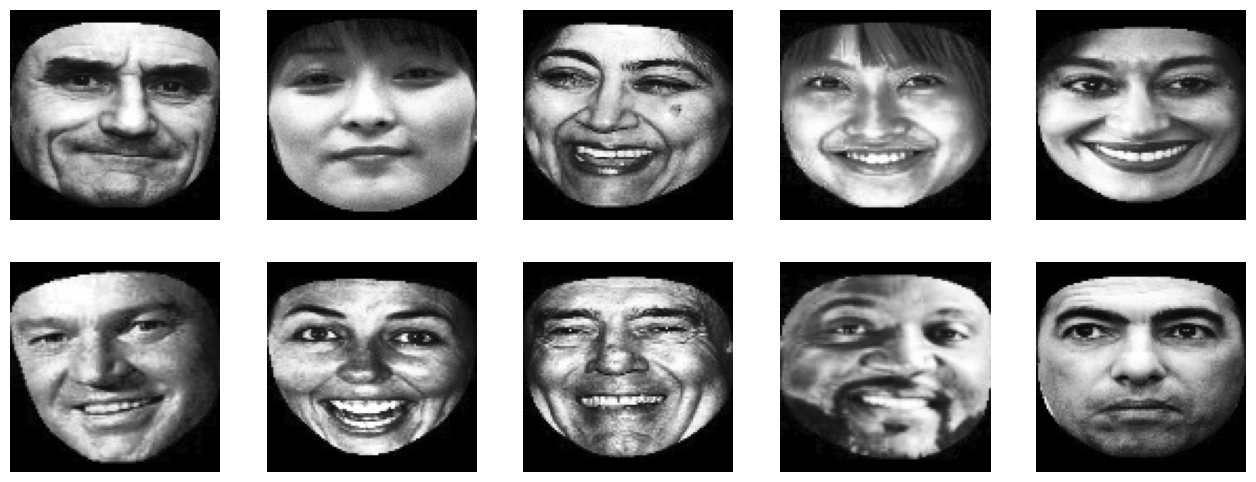

In [16]:
def plot_image_mosaic(image_paths, centroid_path, grid_shape=(4, 4)):
    fig, axes = plt.subplots(*grid_shape, figsize=(16, 6))
    for i, ax in enumerate(axes.flat):
        if i == 0:
            image = cv2.imread(centroid_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            ax.imshow(image)
            ax.axis('off')
            continue

        if i < len(image_paths):
            image = cv2.imread(image_paths[i])
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
            ax.imshow(image)
            ax.axis('off')
        else:
            ax.axis('off')
    plt.show()

plot_image_mosaic(paths[cluster_labels == 0], closest_exampl_paths[0], grid_shape=(2, 5))

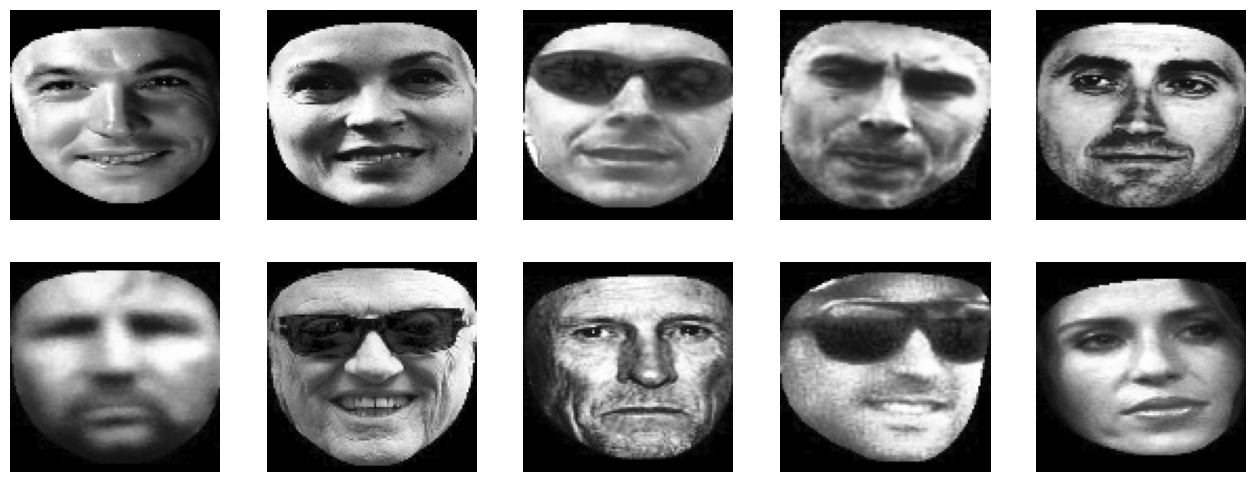

In [17]:
plot_image_mosaic(paths[cluster_labels == 1], closest_exampl_paths[1], grid_shape=(2, 5))

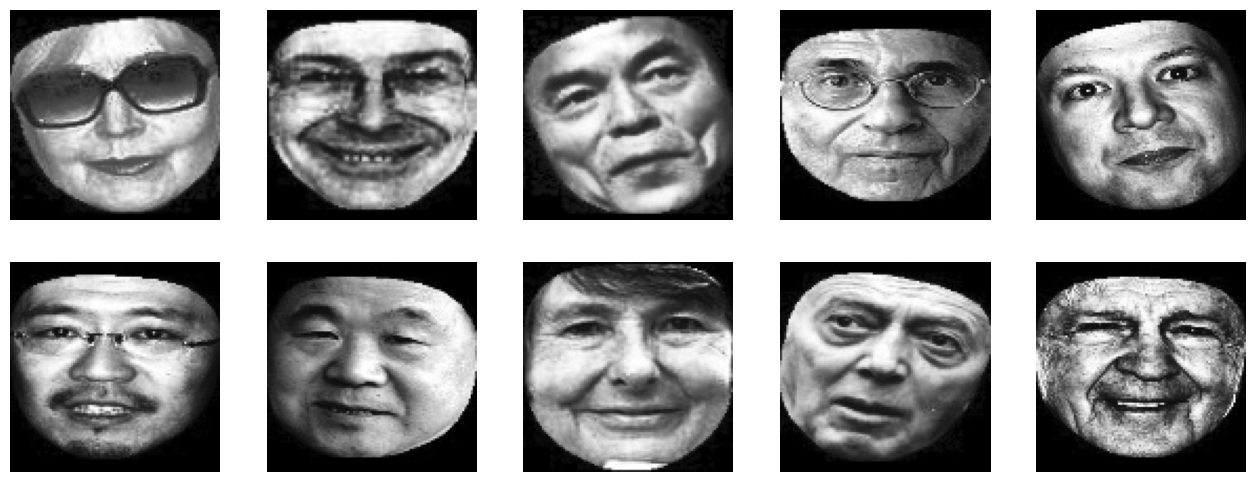

In [18]:
plot_image_mosaic(paths[cluster_labels == 2], closest_exampl_paths[2], grid_shape=(2, 5))

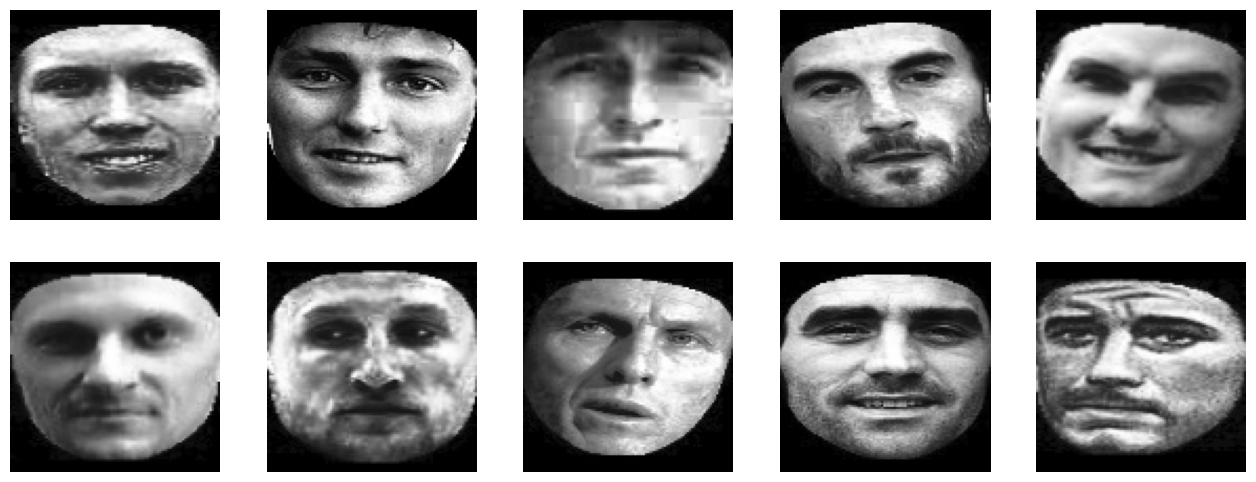

In [19]:
plot_image_mosaic(paths[cluster_labels == 3], closest_exampl_paths[3], grid_shape=(2, 5))

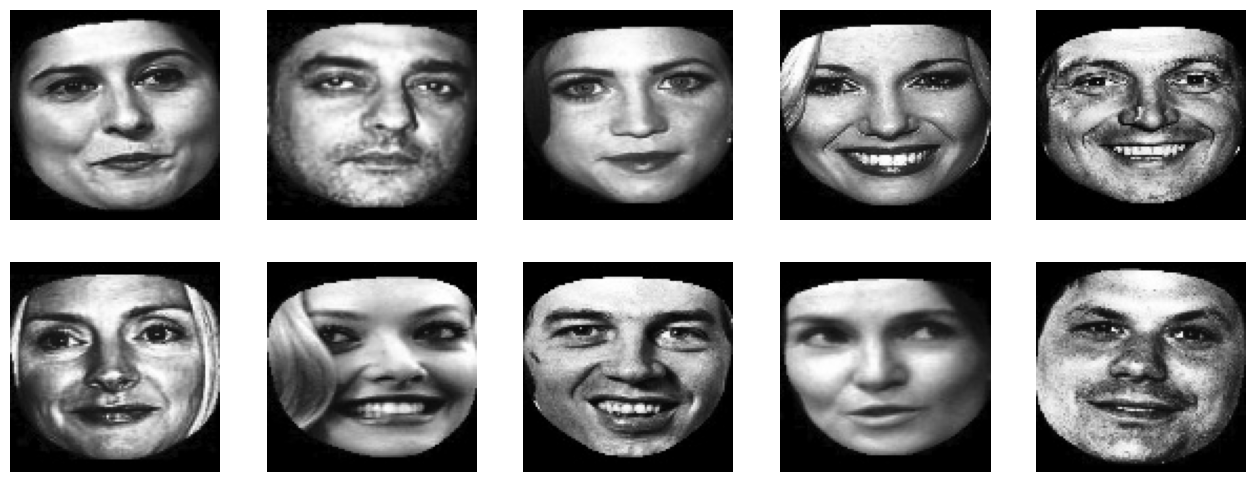

In [20]:
plot_image_mosaic(paths[cluster_labels == 4], closest_exampl_paths[4], grid_shape=(2, 5))

In [ ]:
plot_image_mosaic(paths[cluster_labels == 5], closest_exampl_paths[5], grid_shape=(2, 5))

IndexError: index 5 is out of bounds for axis 0 with size 5